In [52]:
# Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("titanic_train.csv")  # read the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


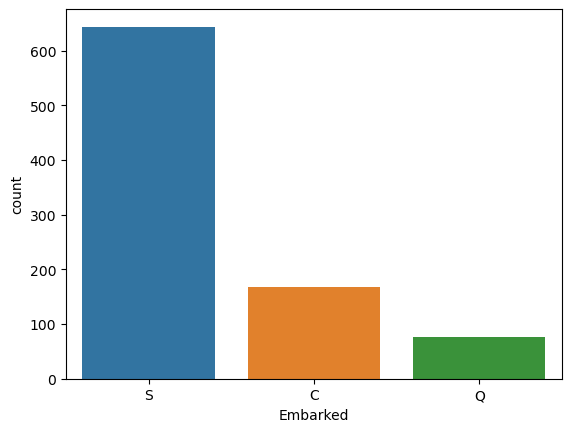

In [28]:
# plot each class freequency
sns.countplot(x='Embarked', data=data)
plt.show()

In [38]:
#Replace Lable columns into binary codes
data['Sex'] = data['Sex'].replace({'male':1,'female':0})
data['Embarked'] = data['Embarked'].replace({'S':0,'C':1,'Q':2})

In [40]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1.0


In [41]:
df = data.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
888,0,3,0,NaN,1,2,23.4500,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [25]:
# Fill the null values
df['Age'] = df['Age'].fillna(data['Age'].mean())
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.00,1,0,7.2500
1,2,1,1,0,38.00,1,0,71.2833
2,3,1,3,0,26.00,0,0,7.9250
3,4,1,1,0,35.00,1,0,53.1000
4,5,0,3,1,35.00,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.00,0,0,13.0000
887,888,1,1,0,19.00,0,0,30.0000
888,889,0,3,0,21205.17,1,2,23.4500
889,890,1,1,1,26.00,0,0,30.0000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [44]:
df[pd.isnull(df).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,NaN,0,0,8.4583,2.0
17,1,2,1,NaN,0,0,13.0000,0.0
19,1,3,0,NaN,0,0,7.2250,1.0
26,0,3,1,NaN,0,0,7.2250,1.0
28,1,3,0,NaN,0,0,7.8792,2.0
...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,1.0
863,0,3,0,NaN,8,2,69.5500,0.0
868,0,3,1,NaN,0,0,9.5000,0.0
878,0,3,1,NaN,0,0,7.8958,0.0


In [59]:
df.Age.fillna(df.Age.mean(), inplace = True)
df.Embarked.fillna(df.Embarked.mean(), inplace = True)

In [60]:
df[pd.isnull(df).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [61]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=41)

In [63]:
# Write one function and call as many as time to check accuracy_score of different models
def metric_score(log_reg, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = log_reg.predict(x_train)
        
        print("\n=================Train Result===================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = log_reg.predict(x_test)
        
        print("\n===========================Test Result=====================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))##model confidence/accuracy

In [64]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [66]:
# Call the function and pass dataset to check train and test score
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True)  # This is for training score 
            
metric_score(log_reg,x_train,x_test,y_train,y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 79.94%

===========================Test Result=====================================
Accuracy Score: 80.27%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       136
           1       0.77      0.71      0.74        87

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

